## Question 1
1. a

A -> C | adjective + pronoun

B -> verb 

C -> noun | pronoun | adjective + noun

noun -> Woo | Paul | Ingrid | Allison | Alex | Ryoga | Corin | Chretien | Nahom | Berlin

pronouns -> He | We | It | You | They

verbs -> eat | sleep | drink | munch | talk

adjectives -> good | smooth | rough | nice | great

D -> AB | ABC (Starting Variable)



1. b
- It is not ambiguous as the way of getting to the accept states are very clear and does not have a different path that makes the same input that takes another different route to be accepted. Expecially, we have a rule that defines all the real world english grammars and builds up the sentence with it. As all the given words only can have one attribute of grammar ("Woo" is not a verb or anything else but only a noun), it is known that a sentence can only have one representation for the machine to understand and process. 

1. c
-  We can do the same thing using the NFA with the alphabet as each words. 
- NFA1 = {{q0,q1,q2,q3,q4,q5}, q0, {q3,q5},{Noun, Subjective Pronoun, Verb, Adjective}, {a table below}} #states, initial state, accept states, alphabet, transitions
- the simple version here, the exact alphabet would be the forms that words are accepted = nouns, pronouns, verbs, and adjectives, 
- A bone of a sentence is noun + verb. However, there can be an object as a noun while the subject can be the subjective pronouns. Also, all nouns and pronouns may have an adjective in front. Thus the transitions may look like below image

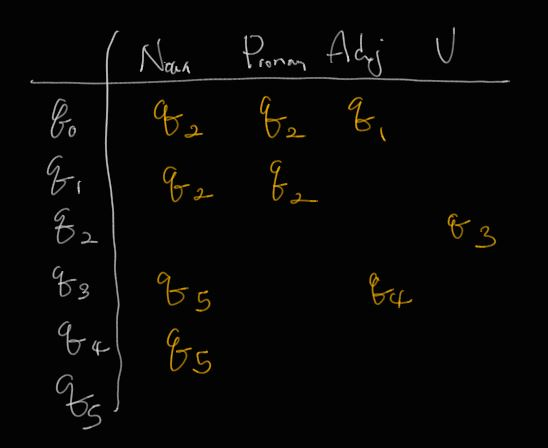

In [2]:
from IPython.display import Image
#transitions
Image(filename = "C:/Users/green/Desktop/Fall 2021/CS142/A3/transitions 1c.jpg")

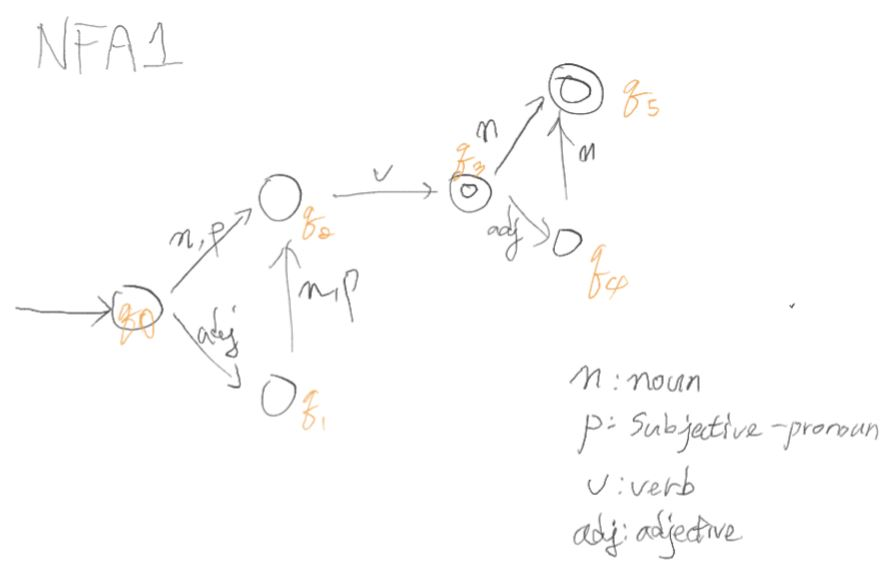

In [1]:
#general overview
Image(filename="C:/Users/green/Desktop/Fall 2021/CS142/A3/NFA.jpg")

In [3]:
#make alphabets and set of words for future use
alph = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '
alphabet = [i for i in alph]
States = {'q'+str(i) for i in range(6)}
nouns = ['Woo', 'Paul', 'Ingrid', 'Allison', 'Alex', 'Ryoga', 'Corin', 'Chretien', 'Nahom', 'Berlin']
pronouns = ['He', 'We', 'It', 'You', 'They']
verbs = ['eat', 'sleep', 'drink', 'munch', 'talk']
adjectives = ['good', 'smooth', 'rough', 'nice', 'great']
words = nouns + pronouns + verbs + adjectives
subjects = nouns + pronouns

#making transition function (from = a set of input, go_to = the target state)
def arrows (sets, go_to):
    arrow = {}
    for i in sets:
        arrow[i] = {go_to}
    return arrow

print(arrows(nouns, 'q1'))
print(alphabet)
print(len(words))

{'Woo': {'q1'}, 'Paul': {'q1'}, 'Ingrid': {'q1'}, 'Allison': {'q1'}, 'Alex': {'q1'}, 'Ryoga': {'q1'}, 'Corin': {'q1'}, 'Chretien': {'q1'}, 'Nahom': {'q1'}, 'Berlin': {'q1'}}
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', ' ']
25


In [4]:
#!pip install automata-lib
from automata.base.automaton import Automaton
#Library for NFA
from automata.fa.nfa import NFA
#Library for (N)PDA
from automata.pda.npda import NPDA


In [13]:
#test code cell
lis = ["a","b"]
vals = ""
for i in lis:
    vals+=i
print(vals)
lis.index("a")

ab


0

In [16]:
#1.d machine parser 1 modelling
#Also a formal definition of NFA is here
#Since the automata_lib does not allow word as an input, we make new list that is 1 on 1 relationship with current words
words_encode = [i for i in "abcdefghijklmnopqrstuvwxy"] #the index of this list == index in words
nouns_encode = words_encode[:10]
pronouns_encode = words_encode[10:15]
verbs_encode = words_encode[15:20]
adjectives_encode = words_encode[20:]
subjects_encode = words_encode[:15]
#now build the nfa
nfa1 = NFA(
    states=States,
    input_symbols= words_encode,
    transitions={
        'q0': {**arrows(subjects_encode,'q2'),**arrows(adjectives_encode, 'q1')},
        'q1': {**arrows(subjects_encode, 'q2')},
        'q2': {**arrows(verbs_encode, 'q3')}, 
        'q3' : {**arrows(nouns_encode, 'q5'), **arrows(adjectives_encode, 'q4')}, 
        'q4' : {**arrows(nouns_encode, 'q5')}, 
        'q5' : {}
    },
    initial_state='q0',
    final_states={'q3', 'q5'}
)
#now define a function that includes the nfa for checking the input
def NFA1(input_string):
    whiteSpace = " "
    input_ = input_string.split(whiteSpace)
    encoded_input = ""
    for i in input_:
        index = words.index(i)
        encoded_word = words_encode[index]
        encoded_input += encoded_word
    return nfa1.accepts_input(encoded_input)

#As a fun experience, I think below can also work as a automata but does not have nodes specifically declared. 
#(still the automata_lib does not accept word as an input, we declare our own)
#here, the main focus is the transitions 
#(tbh, I cannot say this 'is' NFA as I've made it my own rather than using 5 tuple definition)
#but it works like how it used to be above (the commented NFA)
def NFA_1(input_string):
    #a variable to return if the input is accepted or not
    Assert = 0
    
    #check if all the input are the member of alphabet (O(n) here by itself)
    for i in input_string:
        if i not in alphabet:
            print(i)
            return False
    
    
    #reform the input to a form that NFA would understand
    whiteSpace = " "
    input_ = input_string.split(whiteSpace)
    
    length = len(input_)
    #Now from the first input check. 
    #only accept when it meets the syntax. length is there to see if there are no other input left when accepting
    if (input_[0] in verbs) and (length == 1):
        Assert = True
        #print(1) #here to check errors while building the code 
    elif input_[0] in subjects: 
        if (input_[1] in verbs) and (length == 2):
            Assert = True
            #print(2)
        elif (input_[1] in verbs):
            if (input_[2] in nouns) and (length == 3):
                Assert = True
                #print(3)
            elif (input_[2] in adjectives):
                if (input_[3] in nouns) and (length == 4):
                    Assert = True
                    #print(4)
                else:
                    Assert = False
                    #print(5)
            else:
                Assert = False
                #print(6)
        else:
            Assert = False
            #print(7)
            
    elif input_[0] in adjectives:
        if input_[1] in subjects: 
            if (input_[2] in verbs) and (length == 3):
                Assert = True
                #print(8)
            elif (input_[2] in verbs):
                if (input_[3] in nouns) and (length == 4):
                    Assert = True
                    #print(9)
                elif (input_[3] in adjectives):
                    if (input_[4] in nouns) and (length == 5):
                        Assert = True
                        #print(10)
                    else:
                        Assert = False
                        #print(11)
                else:
                    Assert = False
                    #print(12)
            else:
                Assert = False
                #print(13)
    
    else:
        Assert = False
        #print(14)
    
    #if the sentence is not accepted
    if Assert == True:
        return True
    else:
        return False

#check if it is working correctly
print(NFA1("Woo talk good Paul")) #True
print(NFA1("good Paul eat great Berlin")) #True
print(NFA1("Woo talks good Paul")) #False as there is no word for 'talks' Thus should raise ValueError

True
True


ValueError: 'talks' is not in list

## Question 2

In [19]:
#German Translation
#Word by Word, make a list of words that are in German (via, google translate)
#same meaning, same order as the original list (nouns, pronouns, verbs, adjectives)
G_alphabets = alphabet + ['ä, ö, ü, ß']
G_nouns = ['Woo', 'Paul', 'Ingrid', 'Allison', 'Alex', 'Ryoga', 'Corin', 'Chretien', 'Nahom', 'Berlin']
G_pronouns = ['Er', 'Wir', 'Es', 'Du', 'Sie'] #He, We, It, You, They
G_verbs = ['essen', 'schlaf', 'trinken', 'mampefn', 'reden'] #eat, sleep, drink, munch, talk
G_adjectives = ['gut', 'glatt', 'rauh', 'nett', 'groß'] #good, smooth, rough, nice, great
G_words = G_nouns + G_pronouns + G_verbs + G_adjectives
G_subjects = G_nouns + G_pronouns
print(G_alphabets)


['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', ' ', 'ä, ö, ü, ß']


2.a 

For the translation automaton, we need to know what is the input word and print out the translated word. 
Here, the input will be a sentence that is already structured and accepted by the NFA1. Then, how shall we translate? 

I am thinking of using the translated list indexes, because, the same index in the list means that the word is having the same meaning. 

Let's say I read the first input (a word) and then an automaton will check the meaning (index of the original list) and output the same meaning. Here, let's use a PDA. 

After an input, it is stored in the stack until it finds the word with same meaning in German. Then, as PDA outputs the translated word, empty the stack. So, stack will have 1 word at most during the iteration. 

Here, since I am considering the input is already an accepted form of NFA1, I am not thinking of translating the grammar to be the same. (Thankfully, German and English has the same language structures for the ones that we've declared for NFA1. (Resource: https://blog.lingoda.com/en/how-to-form-basic-german-sentences/
)



In [20]:
#2a Automaton for English -> German Translation
#as the index of the words are the same, we use this characteristics to solve the problem
#We will check the index of the two list. (words, G_words) that contains all the words

#Again make our own
def Translator1(input_string):
    #check if the input is accepted by NFA1
    #if nfa1.accepts_input(input_string) == False:
    #    it will return a value error
    
    #Translate!
    
    Stack = [0]
    ##reform the input to a form that PDA would understand
    whiteSpace = " "
    input_ = input_string.split(whiteSpace)
    
    translate = []
    for i in input_:
        Stack[0] = i
        index = words.index(i)
        translate.append(G_words[index])
        Stack[0] = 0 #pop the stack
    
    translated = ""
    for i in translate:
        translated += (i + ' ')
    
    return translated
    

print(Translator1("Woo talk good Paul")) # "Woo reden gut Paul"
print(Translator1("Woo talks good Paul")) #False


Woo reden gut Paul 


ValueError: 'talks' is not in list

2. b
Computationally expensive to have all the words saved in the database for the two different language. Also, there may not be a word that directly translate with the same exact meaning. Consider 'Schadenfreude' as it does not have a direct word to translate and English is just using the same word for the meaning now. Third, it is impossible to consider minor grammars that makes the sentences more fluid, such as tense. 


## Question 3

Auto-code Function Generator

In [12]:
#from the input string, let there be an auto-generated python function.
#input is set in a form of "f(x) = ~" and it requires spaces at the right and the left of the equal sign
#trial 1
def Auto_FG(input_string):
    length = len(input_string)
    whiteSpace = " "
    input_ = input_string.split(whiteSpace)
    front = y
    compute = input_[2]
    commas = ','
    parameters = front[2:-1].split(commas) #only looking inside the parenthesis
    
    #now generate the python function and print out the result
    return def f(parameters):
        y = compute
        return y
    
#hmm, this is not working as I thought it would... sad
#Let's try the conventional way

    
    

SyntaxError: invalid syntax (Temp/ipykernel_10836/3617873392.py, line 14)

3.a Formal definition of Language as Grammar
- The language takes in math representations(variables, symbols, f(x), sin, cos, tan, log, sqrt, numbers) and equal sign as the input. 
- Grammar is considered like this as a CFG. [Formal Definition]
    - alphabet : {f(x), x,y, +,-,/,\*, 0,1,2,3,4,5,6,7,8,9,sin, cos, tan, log, sqrt}
    - Variables: {<Equation>, A,B,C,D,E,F,G,H,I,J}
    - Rules: (image below)
    - Starting Variable (S) is the <Equation>

3.b CFG to PDA
- We have learned in class that we can translate CFGs into PDA by having loops for the rules. 
- The state diagrame is (image below) 
- Formal definition will look like this
    - States: 
    - Input Alphabet: {x,y,0,1,2,3,4,5,6,7,8,9}
    - Stack Alphabet: {A,I,Eq, F, m, $, epsilon, (, ), x,y, 0,1,2,3,4,5,6,7,8,9}
    - Transitions: (Table image below)
    - Initial State: q0
    - Accept State: q13
    - Thus, MachineParseFunc = {States, Input Alphabets, Stack Alphabet, Transitions, Initial State, Accept State}
- However, there will be some adjustments made for the NPDA to work well with the adjusted input. Current NPDA defined here works with the input rightaway, however, I found it hard to implement it as there are some repetitive actions that makes me confused (such as 0~9, 0~9 -> 0~9. But I will have to write this with all possible combinations that can happen in the input). Also, the NPDA here considers 'sin' and all other mathematical functions as one input represented as m. But we need to manually change the settings before taking the input right away to the PDA

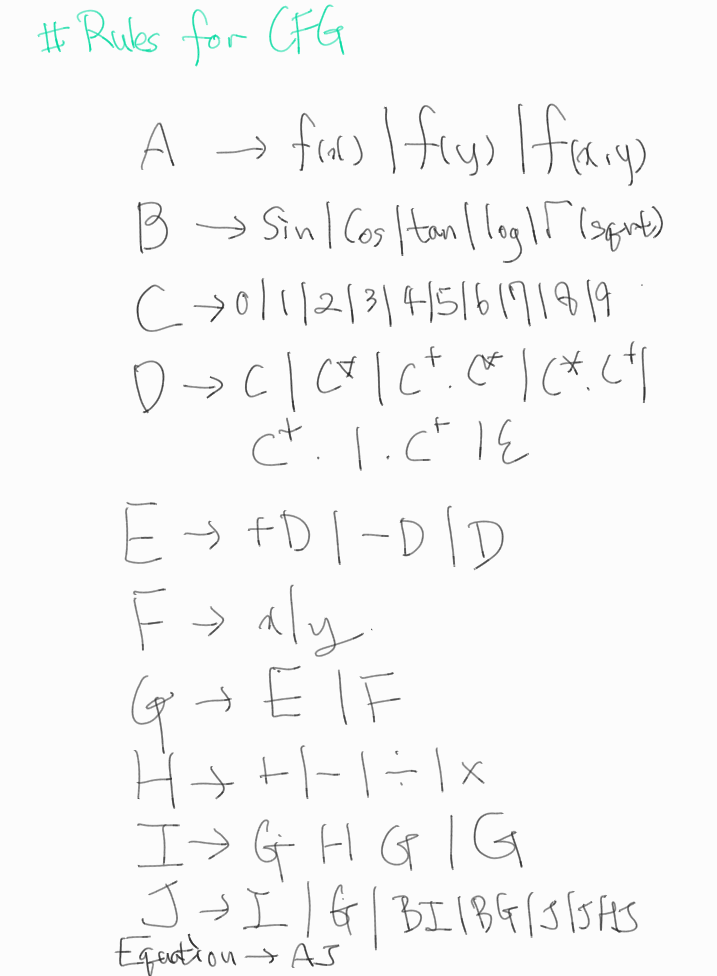

In [30]:
#Rules for the CFG
Image(filename="C:/Users/green/Desktop/Fall 2021/CS142/A3/rules_cfg.png")

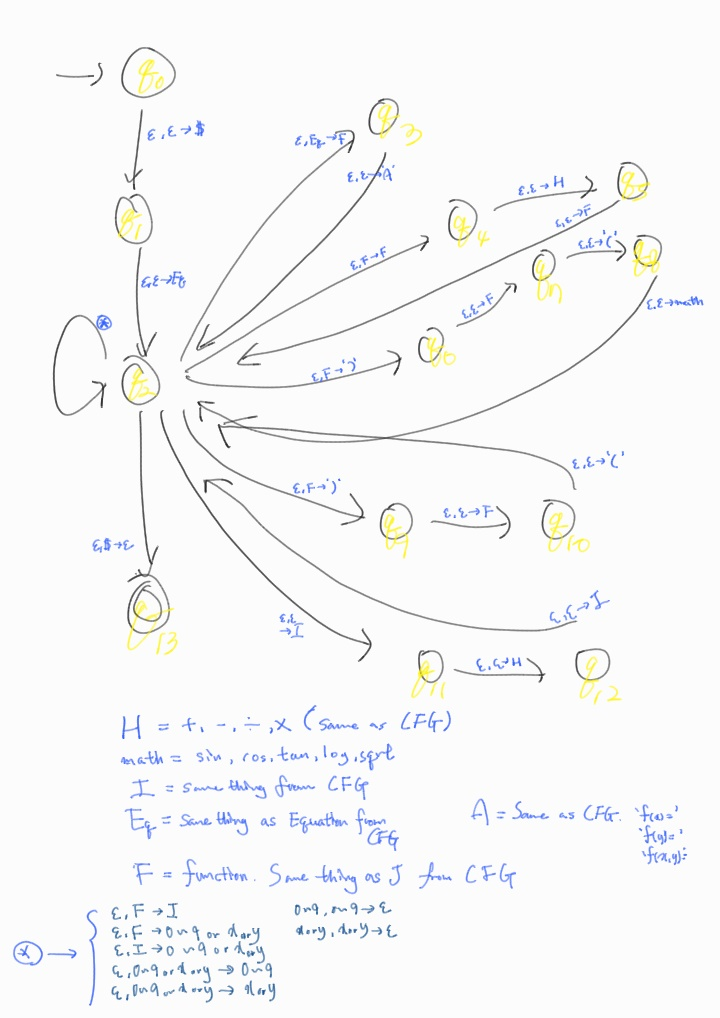

In [39]:
#State Diagram of PDA (MachineParseFunc)
Image(filename="C:/Users/green/Desktop/Fall 2021/CS142/A3/Inkedstate_d.jpg")
#'A' for the edge q3 -> q2 stands for 'f(x) =' or 'f(y) =' or 'f(x,y) ='
#'H' for +,-,/,*
#Will say Eq as E for implementing this in python tho (python only allows one character at a time)

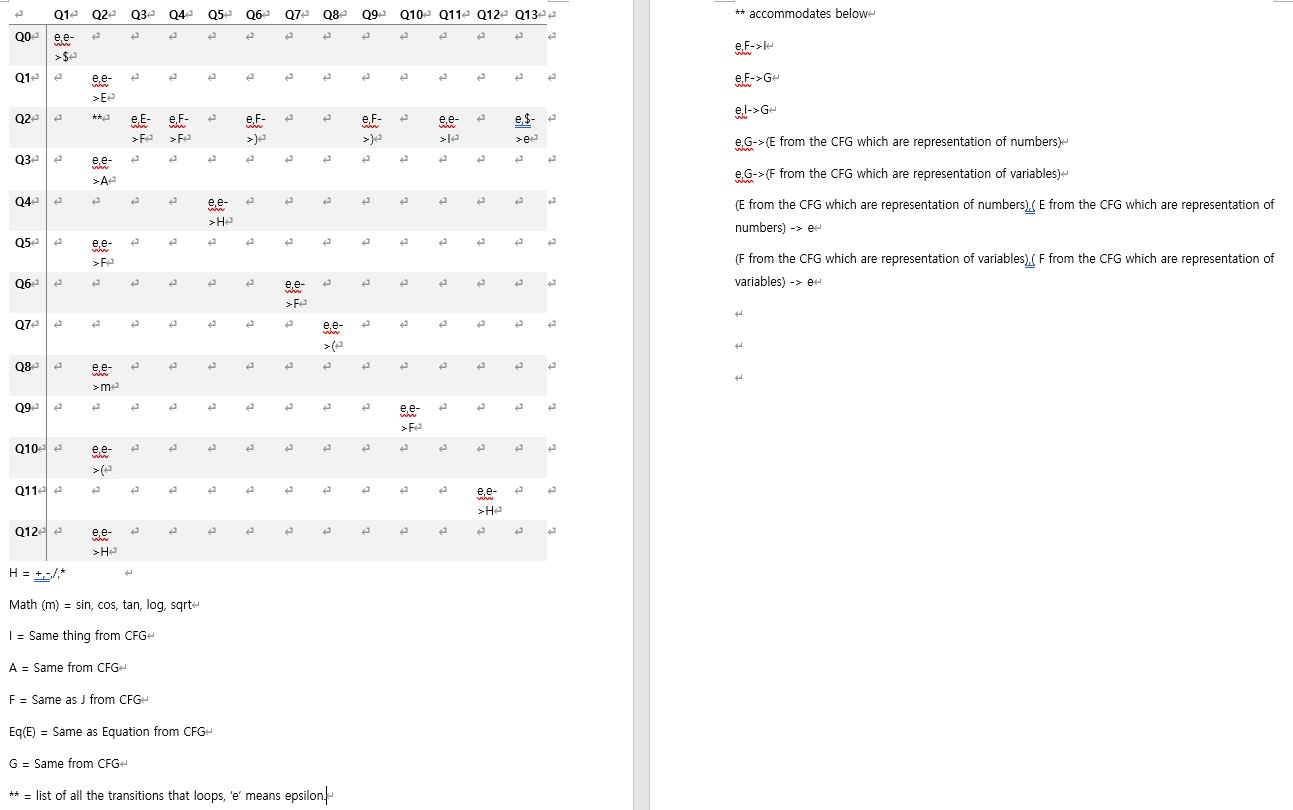

In [3]:
#Transition Table of PDA
Image(filename="C:/Users/green/Desktop/Fall 2021/CS142/A3/PDA.jpg")
#all the images will be also available in the zip file (secondary file)

In [35]:
#MachineParseFunc but adjusted
#tried with converting CFG but didn't work that smoothly :(
from automata.pda.npda import NPDA
numbers = [i for i in range(1,10)]
v = ['x','y'] #v for variable
A = ['f(x) = ', 'f(y) = ', 'f(x,y) = ']
math = ['sin','cos','sqrt','log','tan']
H = ['+','-','/','*'] 

#before putting the input inside the PDA we need some adjustments
def translator(input_func): #input only as a string
    output = input_func
    for i in A:
        output = output.replace(i, 'A')
    for i in v:
        output = output.replace(i,'v')
    for i in numbers:
        #change the string numbers into n
        output = output.replace(str(i),'n')
    for i in H:
        output = output.replace(i,'H')
    for i in math:
        output = output.replace(i, 'm') #math represented as a single letter m
    return output



In [36]:
#code testing cell
As = 'f(x) = 7'
for i in A:
    As = As.replace(i, 'S')
print(As)
state = {'q' + str(i) for i in range(0,14)}
print(state)

S7
{'q7', 'q13', 'q12', 'q5', 'q9', 'q11', 'q1', 'q3', 'q0', 'q2', 'q8', 'q10', 'q4', 'q6'}


In [37]:
MPF = NPDA(
    states = {'q0', 'q1', 'q2','q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11','q12', 'q13'},
    input_symbols = {'m','A','H','(',')' ,'n','v'},
    stack_symbols = {'A','m','E','F','I','H','G','(',')','','n','v','$'},
    transitions = {
        'q0': {
            '': {
                '': {('q1', '$')},
            },
        },
        'q1': {
            '': {
                '$': {('q2', ('E', '$'))},
            },
        },
        'q2': {
            '': {
                'E': {('q3', 'F')},
                'F': {
                    ('q2', 'I'),
                    ('q2', 'G'),
                    ('q4', 'F'),
                    ('q6', ')'),
                    ('q9', ')'),
                },
                'I': {('q2', 'G'), ('q11', 'I')},
                'G': {('q2', 'n'), ('q2', 'v')},
                '$': {('q13', '')},
            },
            'n': {
                'n': {('q2', '')},
            },
            'v': {
                'v': {('q2', '')},
            },
            'H': {
                'H': {('q2', '')},
            },
            'm': {
                'm': {('q2', '')},
            },
            'A': {
                'A': {('q2', '')},
            },
        },
        'q3': {
            '': {
                'A': {('q2', ('A','F'))},
            },
        },
        'q4': {
            '': {
                'F': {('q5', ('H','F'))},
            },
        },
        'q5': {
            '': {
                'H': {('q2', ('F','H'))},
            },
        },
        'q6': {
            '': {
                ')': {('q7', ('F',')'))},
            },
        },
        'q7': {
            '': {
                'F': {('q8', ('(','F'))},
            },
        },
        'q8': {
            '': {
                '(': {('q2', ('m','('))},
            },
        },
        'q9': {
            '': {
                ')': {('q10', ('F',')'))},
            },
        },
        'q10': {
            '': {
                'F': {('q2', ('(','F'))},
            },
        },
        'q11': {
            '': {
                'I': {('q12', ('H','I'))},
            },
        },
        'q12': {
            '': {
                'H': {('q2', ('I','H'))},
            },
        },
    },
    initial_state='q0',
    initial_stack_symbol='',
    final_states={'q13'},
    acceptance_mode='final_state'
)

In [38]:
#sample codes for testing
print(translator('f(x) = 7*x')) #AnHV -> AGHG -> AI -> AJ -> <Equation>
print(MPF.accepts_input(translator('f(x) = 7*x')))


AnHv
False


In [18]:
def generator(input_string):
    #input_string in the form of f(x) = ~
    if MPF.accepts_input(translator(input_string)):
        new = str()
        whiteSpace = ' '
        input_ = input_string.split(whiteSpace)
        new = "def" + input_[0] + "\n    return" + input_[2] 
        return new
    else:
        return 'rejected'

4. Concluding Remarks
- Example of statistical based language translators are easy to find around us. Google translate, papago, etc. They are now currently considering more than what we have done to make the sentence more smoother as well as having the correct translation with tenses. Stats helps the computer to guess what meaning does each word is trying to represent (as there can be more than one meaning for a same word) and this makes translations possible with nuances, connotations, etc some what possible. But to do so, computer needs to be trained with actual sentences being used rather than just having rules and dictionaries for word to word translation. With abundance of data that we can get nowadays, it is making these online translators more effective with diverse languages. It is only that the computer needs more storage to store all the data. Also, this training takes a lot of time and energy. So, instead of training a giant AI, it might be cheaper and efficient (human only needs some food) to hire a translator instead and in this way, sentences can be translated more smoothly too as humans considers context very well. However, when AI is built, it can be distributed to all those who can't hire a translator in person. 
- [Summary] Benefit of statistical NLP: smoother sentence translation. Drawback of statistical NLP: Takes more storage and energy compared to rule-based NLP. (as well as the case when humans are compared to statistical NLP).
- In my opinion, language generator and recognizer needs to have all possible cases inside for rule-based NLP as it does not allow training, and thus we have to make all the rules possible. Hpwever, with statistical NLP, we can get a bit more easier on building the rules for language generator and recognizers as trained AI can make some adjustments by itself as a result of training. Especially, statistical NLP will require less work significantly in building the generator and recognizer as we don't need to hustle with context and nuances as it is automatically considered. 

5. HCs application
- heuristics: finding ways to overcome the constraints (such as modifying the input before putting it inside the automata). This was helpful especially when the codes did not work as I wanted it to be. 
- gapanalysis: know where we are starting, what is the goal state (making the codes work, finding a working model) helps me define the problem better
- breakitdown: making a big question into chunks that works easier 
- modeling: making models of NFA, CFG, and NPDA that serves the purpose

Codes:
https://gist.github.com/Jeongwoo-KGI/b52828753d5c0b19ccc0aecbd50e4c77 